# Домашнее задание "Временные ряды, общая теория"

In [ ]:
Скачайте материалы к занятию. Проанализируйте ряды, сделайте их стационарными.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
sales_of_company_x = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")

In [4]:
sales_of_company_x.head()

,Month,Count
0,1965-01,154
1,1965-02,96
2,1965-03,73
3,1965-04,49
4,1965-05,36


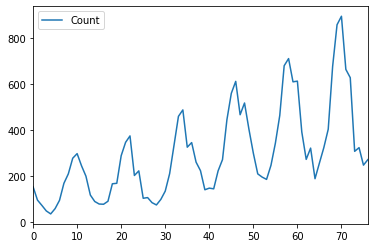

In [5]:
sales_of_company_x.plot()

In [6]:
X = sales_of_company_x.Count
X.head()

0    154
1     96
2     73
3     49
4     36
Name: Count, dtype: int64

In [7]:
from statsmodels.tsa.stattools import adfuller

In [8]:
dftest = adfuller(X, autolag='AIC')
pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])

Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
dtype: float64

In [9]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [10]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

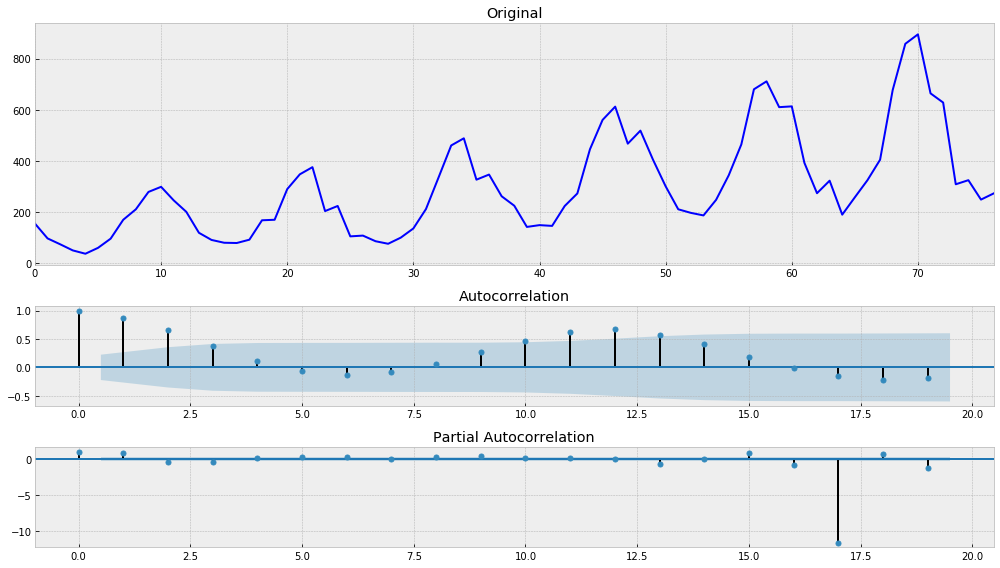

In [11]:
tsplot(X)

In [ ]:
Исходя из значений p-value теста Дики-Фуллера и графиков коррелограмм, можно сделать вывод, что ряд нестационарен. 
Для приведения к стационарности сначала используем метод Бокса-Кокса, чтобы убрать размах дисперсии

In [12]:
from scipy.stats import boxcox

In [13]:
X = boxcox(X, 0)

In [14]:
dftest = adfuller(X, autolag='AIC')
pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])

Test Statistic                 -0.908049
p-value                         0.785310
#Lags Used                     12.000000
Number of Observations Used    64.000000
dtype: float64

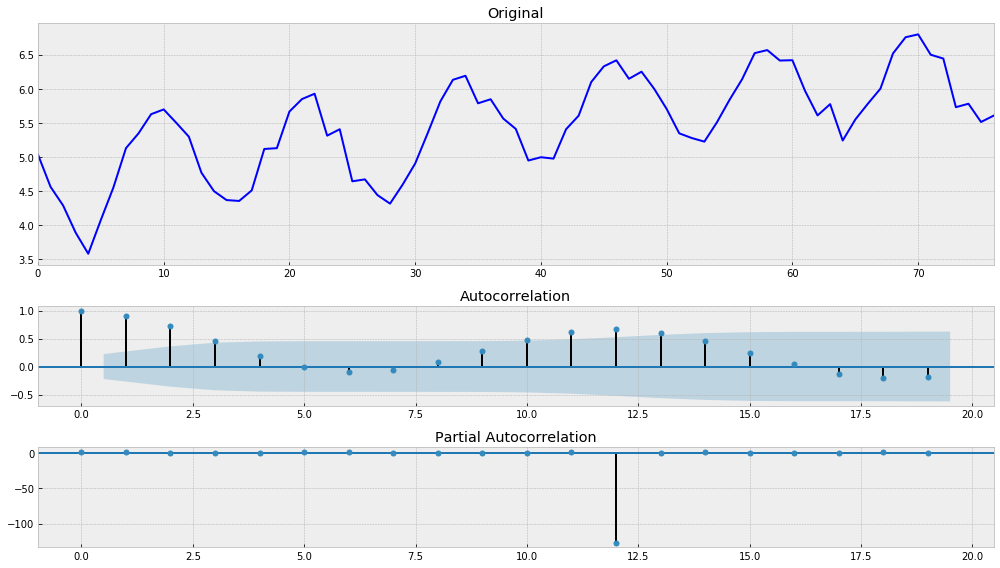

In [15]:
tsplot(X)

In [ ]:
Метод Бокса-Кокса не очень помог, ряд все еще нестационарен
Воспользуемся методом дифференцирования

In [16]:
import numpy as np
X = np.diff(X, 5)

In [17]:
dftest = adfuller(X, autolag='AIC')
pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])

Test Statistic                -6.601096e+00
p-value                        6.732854e-09
#Lags Used                     1.200000e+01
Number of Observations Used    5.900000e+01
dtype: float64

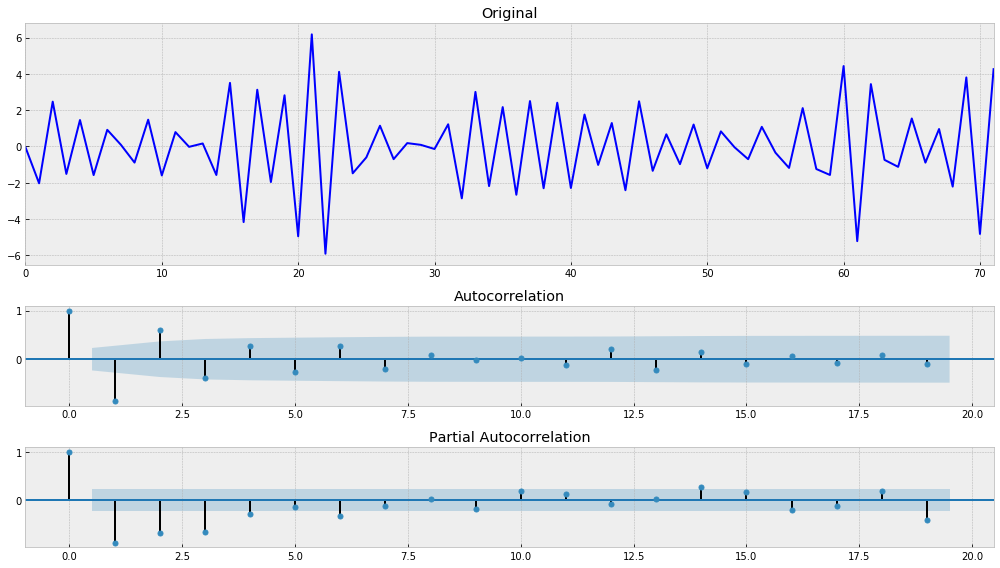

In [18]:
tsplot(X)

In [ ]:
Значение p-value < 0.05 и ушла сезонность, то есть можем говорить о том, что ряд стационарен.